<a href="https://colab.research.google.com/github/w0nsdoof/Data-Analysis-and-Storage/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependecies and dataset

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [23]:
!kaggle datasets download -d carrie1/ecommerce-data

403 - Forbidden - Permission 'datasets.get' was denied


In [7]:
!unzip ecommerce-data.zip

Archive:  ecommerce-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("netflix_titles.csv")

print(df.shape)

(8807, 12)


In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Preparation


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8793 non-null   object        
 1   type          8793 non-null   object        
 2   title         8793 non-null   object        
 3   director      8793 non-null   object        
 4   cast          8793 non-null   object        
 5   country       8793 non-null   object        
 6   date_added    8793 non-null   datetime64[ns]
 7   release_year  8793 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8793 non-null   object        
 10  listed_in     8793 non-null   object        
 11  description   8793 non-null   object        
 12  year_added    8793 non-null   float64       
 13  month_added   8793 non-null   float64       
 14  season_count  8793 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1),

In [40]:
missing_data = df.isnull().sum() / df.shape[0] * 100
missing_data

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.000000


In [29]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [34]:
df["date_added"] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [39]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2


In [38]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if isinstance(x['duration'], str) and "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if isinstance(x['duration'], str) and "Season" not in x['duration'] else "", axis = 1)

In [45]:
duplicate_rows_df = df[df.duplicated()]
df.drop_duplicates()
print("number of duplicate rows: ", duplicate_rows_df.shape) # None

number of duplicate rows:  (0, 15)


In [48]:
df.fillna(
    {"director": "Unknown",
     "cast": "Unknown",
     "country": "Unknown"
    }, inplace=True)

# Drop rows where any other columns have missing values
df.dropna(inplace=True)
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [49]:
df.describe()

,date_added,release_year,year_added,month_added
count,8793,8793.000000,8793.000000,8793.000000
mean,2019-05-17 14:13:03.623336704,2014.183100,2018.872740,6.655976
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-02 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 00:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.824128,1.574023,3.435754


In [63]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [64]:
invalid_ratings = {"74 min", "84 min", "66 min"}

df = df.drop(df[df["rating"].isin(invalid_ratings)].index)

# Visualization

In [55]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2


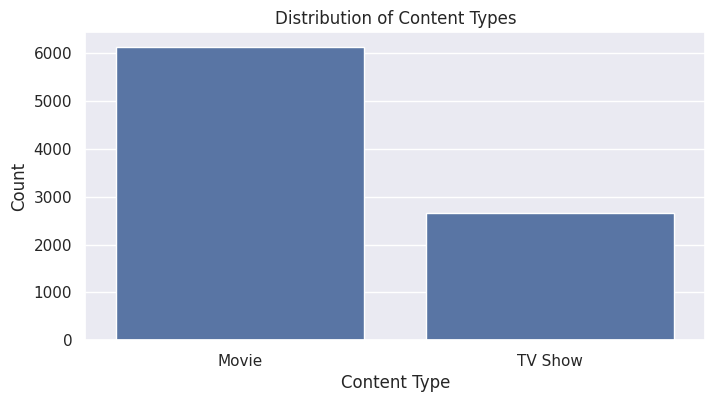

In [57]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Types")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

In [124]:
df1 = df[df['type'] == 'Movie']
df2 = df[df['type'] == 'TV Show']

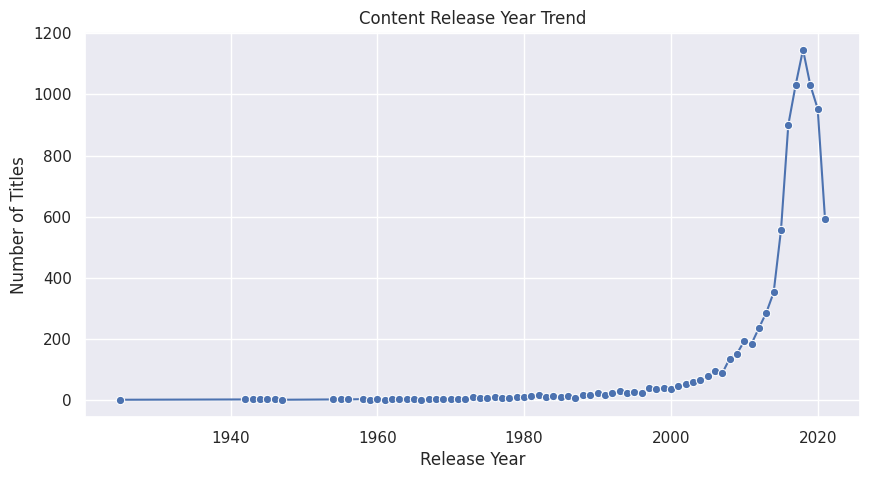

In [59]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
plt.title("Content Release Year Trend")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

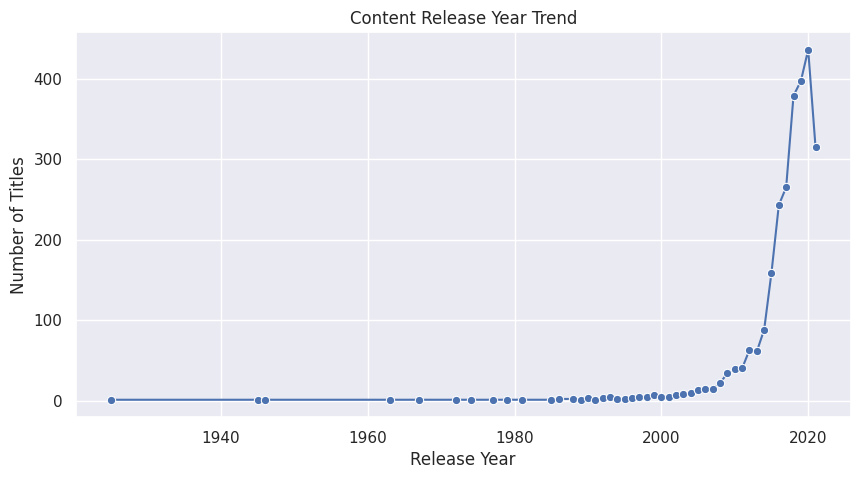

In [126]:
release_counts = df2['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
plt.title("Content Release Year Trend")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

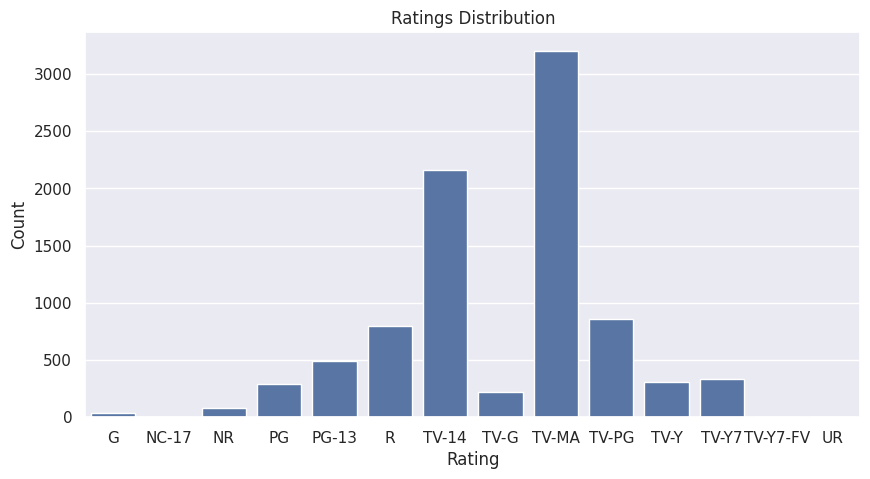

In [129]:
rating_order = sorted(df['rating'].unique())
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=rating_order)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

<ipython-input-119-03a5e24b9b99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


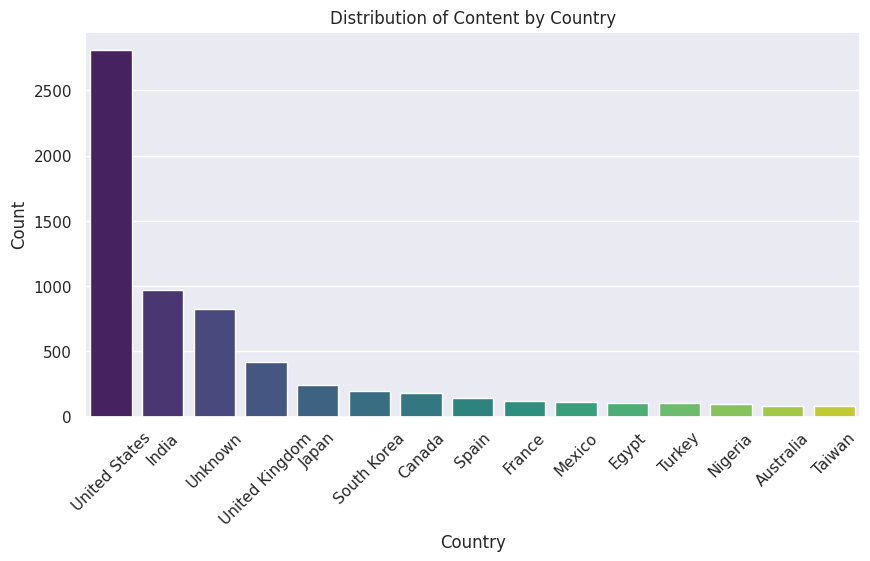

In [119]:
country_counts = df['country'].value_counts().nlargest(15)
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("Distribution of Content by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-108-8ab14a6f2420>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listed_counts.index, y=listed_counts.values, palette='viridis')


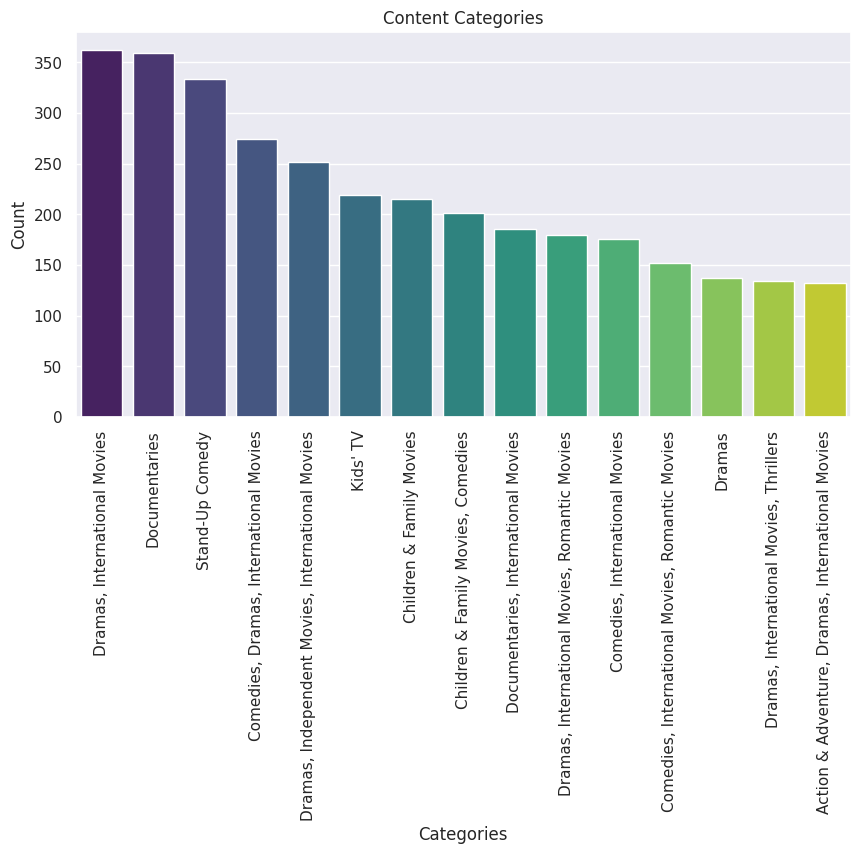

In [108]:
listed_counts = df['listed_in'].value_counts().nlargest(15)
plt.figure(figsize=(10, 5))
sns.barplot(x=listed_counts.index, y=listed_counts.values, palette='viridis')
plt.title("Content Categories")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

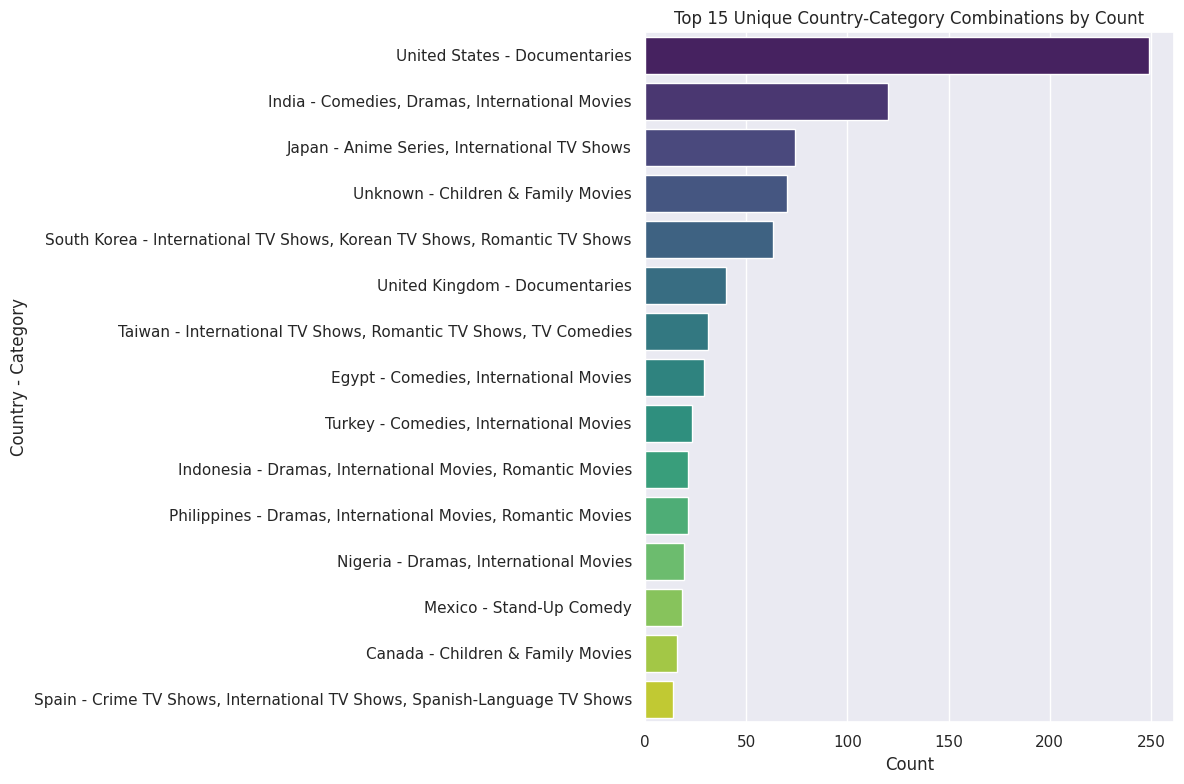

In [105]:
# Group the dataframe by 'country' and 'listed_in' and count the occurrences
grouped = df.groupby(['country', 'listed_in']).size().reset_index(name='count')

# For each country, select the category with the highest count
unique_by_country = grouped.loc[grouped.groupby('country')['count'].idxmax()].reset_index(drop=True)

# From these unique selections, choose the top 15 by count
top15_unique = unique_by_country.nlargest(15, 'count')

# Create a new column that combines country and category for labeling
top15_unique['country_category'] = top15_unique['country'] + " - " + top15_unique['listed_in']

# Visualize using a horizontal bar plot with hue assigned to country_category
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top15_unique, x='count', y='country_category', hue='country_category',
                 palette="viridis", dodge=False)
plt.title("Top 15 Unique Country-Category Combinations by Count")
plt.xlabel("Count")
plt.ylabel("Country - Category")
plt.tight_layout()
plt.show()

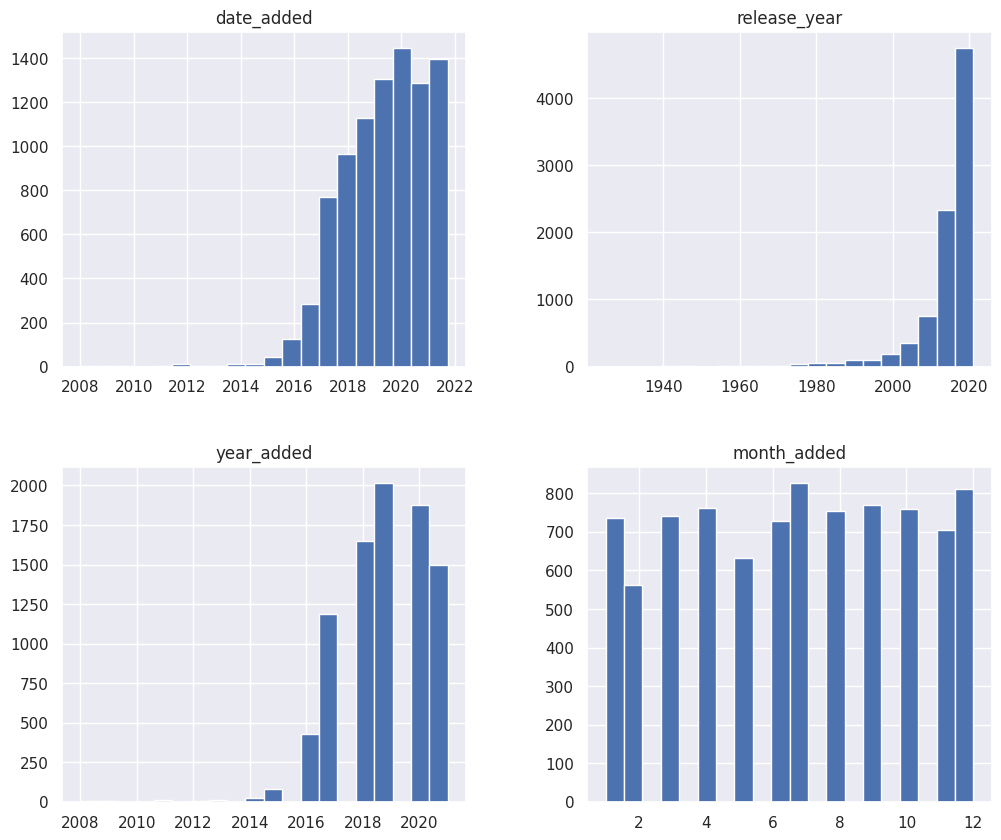

In [85]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

In [102]:
anime = df[df['listed_in'] == 'Anime Series'].head(5)
anime

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
376,s377,TV Show,Transformers: War for Cybertron: Kingdom,Unknown,"Jake Foushee, Jason Marnocha, Linsay Rousseau,...",Unknown,2021-07-29,2021,TV-Y7,,Anime Series,The frantic race to locate the Allspark first ...,2021.0,7.0,1
1168,s1169,TV Show,DOTA: Dragon's Blood,Unknown,"Yuri Lowenthal, Lara Pulver, Kari Wahlgren, Al...",United States,2021-03-25,2021,TV-MA,,Anime Series,A conflicted yet courageous Dragon Knight must...,2021.0,3.0,1
1238,s1239,TV Show,Pacific Rim: The Black,Unknown,"Gideon Adlon, Calum Worthy, Erica Lindbeck, Vi...","United States, Australia",2021-03-04,2021,TV-14,,Anime Series,"After Kaiju ravage Australia, two siblings pil...",2021.0,3.0,1
1482,s1483,TV Show,Transformers: War for Cybertron: Earthrise,Unknown,"Jake Foushee, Jason Marnocha, Linsay Rousseau,...",Unknown,2020-12-30,2020,TV-Y7,,Anime Series,While Megatron takes drastic measures to save ...,2020.0,12.0,1
1790,s1791,TV Show,Blood of Zeus,Unknown,"Derek Phillips, Jason O'Mara, Claudia Christia...",United States,2020-10-27,2020,TV-MA,,Anime Series,"A commoner living in ancient Greece, Heron dis...",2020.0,10.0,1


<ipython-input-133-5ec5bbab60fe>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




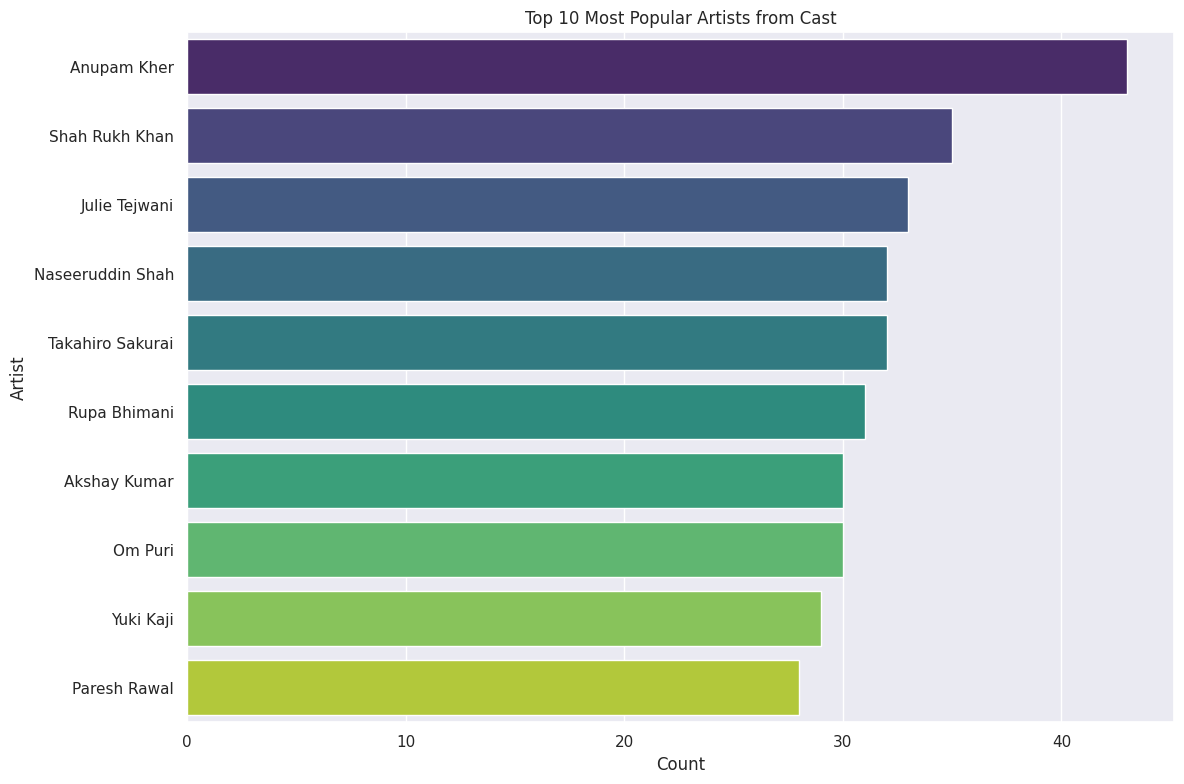

In [133]:
df_cast = df.copy()

df_cast['cast'] = df_cast['cast'].str.split(',')
df_exploded = df_cast.explode('cast')

# Remove any extra whitespace around the artist names
df_exploded['cast'] = df_exploded['cast'].str.strip()

df_exploded = df_exploded[df_exploded['cast'] != 'Unknown']

# Count the frequency of each artist
artist_counts = df_exploded['cast'].value_counts().reset_index()
artist_counts.columns = ['artist', 'count']

# Display the top 10 most popular artists
top10_artists = artist_counts.head(10)
# Visualize the top 10 artists using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_artists, x='count', y='artist', palette="viridis")
plt.title("Top 10 Most Popular Artists from Cast")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()